In [1]:
import pandas as pd
import numpy as np

# Support Vector Machines Lab

In this lab we will explore several datasets with SVMs. The assets folder contains several datasets (in order of complexity):

1. Breast cancer
- Spambase
- Car evaluation
- Mushroom

For each of these a `.names` file is provided with details on the origin of data.

In [16]:
bc = pd.read_csv('../../assets/datasets/breast_cancer.csv')

In [4]:
sp = pd.read_csv('../../assets/datasets/spambase.csv')

In [5]:
car = pd.read_csv('../../assets/datasets/car.csv')

In [6]:
mush = pd.read_csv('../../assets/datasets/mushroom.csv')

# Exercise 1: Breast Cancer



## 1.a: Load the Data
Use `pandas.read_csv` to load the data and assess the following:
- Are there any missing values? (how are they encoded? do we impute them?)
- Are the features categorical or numerical?
- Are the values normalized?
- How many classes are there in the target?

Perform what's necessary to get to a point where you have a feature matrix `X` and a target vector `y`, both with only numerical entries.

In [40]:
bc.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [18]:
bc[pd.isnull(bc).any(axis = 1)]

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [19]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [20]:
bc.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
bc[bc['Bare_Nuclei'] == '?']

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [35]:
bare_nu = bc[bc['Bare_Nuclei'] != '?']['Bare_Nuclei'].astype(int)

In [37]:
med = np.median(bare_nu)
med

1.0

In [41]:
bc.loc[:, "Bare_Nuclei"] = bc['Bare_Nuclei'].apply(lambda x: 1.0 if x == '?' else int(x))

In [39]:
bc['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [42]:
bc.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [43]:
col = [x for x in bc.columns if x not in ['Sample_code_number', 'Class']]

X = bc[col]
X.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [44]:
y = bc['Class']

## 1.b: Model Building

- What's the baseline for the accuracy?
- Initialize and train a linear svm. What's the average accuracy score with a 3-fold cross validation?
- Repeat using an rbf classifier. Compare the scores. Which one is better?
- Are your features normalized? if not, try normalizing and repeat the test. Does the score improve?
- What's the best model?
- Print a confusion matrix and classification report for your best model using:
        train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

**Check** to decide which model is best, look at the average cross validation score. Are the scores significantly different from one another?

In [48]:
y.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [46]:
y.count()

699

In [51]:
241/699.

0.3447782546494993

baseline accuracy:

Class 2 = 0.655

Class 4 = 0.345

In [52]:
from sklearn.svm import SVC

In [53]:
sv = SVC(kernel='linear')

In [54]:
from sklearn.cross_validation import cross_val_score

In [55]:
cv = cross_val_score(sv, X, y, cv = 3)

In [57]:
cv.mean()

0.96287109874870713

In [58]:
sv_rbf = SVC(kernel='rbf')

In [59]:
cv_rbf = cross_val_score(sv_rbf, X, y, cv = 3)
cv_rbf.mean()

0.95574247788618072

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
X_s = StandardScaler().fit_transform(X)

In [62]:
cv_s = cross_val_score(sv, X_s, y, cv = 3)
cv_s.mean()

0.96430171391322794

In [63]:
cv_rbf_s = cross_val_score(sv_rbf, X_s, y, cv = 3)
cv_rbf_s.mean()

0.96573849552242341

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

In [66]:
scale = StandardScaler().fit(X_train)

In [67]:
X_train_s = scale.transform(X_train)

In [68]:
X_test_s = scale.transform(X_test)

In [69]:
sv_rbf.fit(X_train_s, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
y_pred = sv_rbf.predict(X_test_s)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
conmat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Benign', 'Predicted Malignant'], index = ['Actual Benign', 'Actual Malignant'])
conmat

,Predicted Benign,Predicted Malignant
Actual Benign,146,5
Actual Malignant,4,76


In [74]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          2       0.97      0.97      0.97       151
          4       0.94      0.95      0.94        80

avg / total       0.96      0.96      0.96       231



**Check:** Are there more false positives or false negatives? Is this good or bad?

There are more false positives. This is good, we want as low false negatives as possible in a cancer prediction scenario.

## 1.c: Feature Selection

Use any of the strategies offered by `sklearn` to select the most important features.

Repeat the cross validation with only those 5 features. Does the score change?

In [78]:
from sklearn.feature_selection import SelectKBest

In [80]:
kbest = SelectKBest(k=5)

In [90]:
X_kbest = kbest.fit_transform(X_s,y)

In [92]:
kbest_cv = cross_val_score(sv_rbf, X_kbest, y, cv = 3)
kbest_cv.mean()

0.96003437608439823

## 1.d: Learning Curves

Learning curves are useful to study the behavior of training and test errors as a function of the number of datapoints available.

- Plot learning curves for train sizes between 10% and 100% (use StratifiedKFold with 5 folds as cross validation)
- What can you say about the dataset? do you need more data or do you need a better model?

In [106]:
from sklearn.model_selection import learning_curve, StratifiedKFold

In [108]:
lc = learning_curve(sv_rbf, X_s, y, cv= StratifiedKFold(n_splits=5))

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


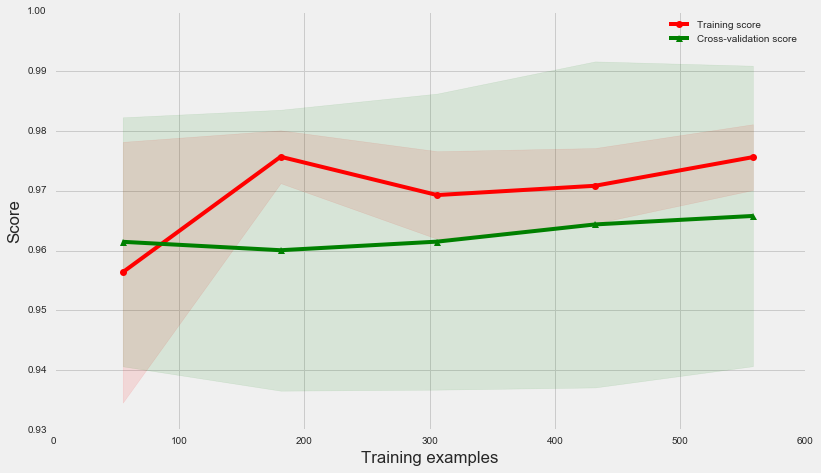

In [125]:
train_scores_mean = np.mean(lc[1], axis=1)
train_scores_std = np.std(lc[1], axis=1)
test_scores_mean = np.mean(lc[2], axis=1)
test_scores_std = np.std(lc[2], axis=1)


plt.figure(figsize = (12,7))

plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(lc[0], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(lc[0], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(lc[0],train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(lc[0], test_scores_mean, '^-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

##  1.e: Grid Ssearch

Use the grid_search function to explore different kernels and values for the C parameter.

- Can you improve on your best previous score?
- Print the best parameters and the best score

In [94]:
from sklearn.grid_search import GridSearchCV

In [99]:
param_dict = {'C': np.arange(0.1, 2,0.1),
              'kernel': ['rbf', 'linear', 'sigmoid', 'poly']
    
}

gs_sv  = GridSearchCV(sv, param_grid=param_dict, cv = 3)

gs_sv.fit(X_s, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear', 'sigmoid', 'poly'], 'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [100]:
gs_sv.best_estimator_

SVC(C=0.10000000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
gs_sv.best_score_

0.9699570815450643

# Exercise 2
Now that you've completed steps 1.a through 1.e it's time to tackle some harder datasets. But before we do that, let's encapsulate a few things into functions so that it's easier to repeat the analysis.

## 2.a: Cross Validation
Implement a function `do_cv(model, X, y, cv)` that does the following:
- Calculates the cross validation scores
- Prints the model
- Prints and returns the mean and the standard deviation of the cross validation scores

> Answer: see above

## 2.b: Confusion Matrix and Classification report
Implement a function `do_cm_cr(model, X, y, names)` that automates the following:
- Split the data using `train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)`
- Fit the model
- Prints confusion matrix and classification report in a nice format

**Hint:** names is the list of target classes

> Answer: see above

## 2.c: Learning Curves
Implement a function `do_learning_curve(model, X, y, sizes)` that automates drawing the learning curves:
- Allow for sizes input
- Use 5-fold StratifiedKFold cross validation

> Answer: see above

## 2.d: Grid Search
Implement a function `do_grid_search(model, parameters)` that automates the grid search by doing:
- Calculate grid search
- Print best parameters
- Print best score
- Return best estimator


> Answer: see above

In [104]:
def do_cv(model, X, y, cv):
    sc = cross_val_score(model, X, y, cv)
    print model
    print "Mean accuracy =", sc.mean()
    print "Std of scores =", sc.std()
    print
    return sc.mean(), sc.std()

In [ ]:
do_cm_cr(model, X, y, names) that automates the following:
Split the data using train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
Fit the model
Prints confusion matrix and classification report in a nice format
Hint: names is the list of target classes

In [ ]:
def do_cm_cr(model, X, y, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

# Exercise 3
Using the functions above, analyze the Spambase dataset.

Notice that now you have many more features. Focus your attention on step C => feature selection

- Load the data and get to X, y
- Select the 15 best features
- Perform grid search to determine best model
- Display learning curves

# Exercise 4
Repeat steps 1.a - 1.e for the car dataset. Notice that now features are categorical, not numerical.
- Find a suitable way to encode them
- How does this change our modeling strategy?

Also notice that the target variable `acceptability` has 4 classes. How do we encode them?


# Bonus
Repeat steps 1.a - 1.e for the mushroom dataset. Notice that now features are categorical, not numerical. This dataset is quite large.
- How does this change our modeling strategy?
- Can we use feature selection to improve this?
